<a href="https://colab.research.google.com/github/SilviaQ98/Web_Scraping/blob/main/Ej2/Desempleo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
!pip install requests
!pip install beautifulsoup4
!pip install pandas
!pip install matplotlib
import json # modulo para trabajar con archivos JSON
import requests # libreria para hacer peticiones HTTP
import pandas as pd # libreria para procesar datos, proporciona funciones para analíticas
from bs4 import BeautifulSoup as bs # Extraer información de paginas web


In [101]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

#url de donde se extraeran los datos
url = 'https://datosmacro.expansion.com/paro'

# Realizar la solicitud GET
response = requests.get(url)

datos = [] # se inicializa una lista vacia
for fila in filas: #iteracion de cada fila de la tabla buscando todas las celdas en cada fila
            celdas = fila.find_all(['th', 'td'])
            #obtencion de los datos de cada celda y se agrega a 'datos' como fila de datos
            datos_fila = [celda.get_text(strip=True) for celda in celdas]
            datos.append(datos_fila) #Agregar los datos al final de la lista

#Presenta los datos en un DataFrame de Pandas
df = pd.DataFrame(datos)
print(df)




                            0                  1     2         3      4  \
0                      Países  Tasa de desempleo  Var.  Var. Año    Mes   
1                  España [+]              12,0%               0  -0,90   
2                Alemania [+]               3,1%               0      0   
3             Reino Unido [+]               4,0%            0,20   0,20   
4                 Francia [+]               7,3%               0   0,10   
5                  Italia [+]               7,8%            0,20  -0,10   
6                Portugal [+]               6,7%            0,10   0,60   
7               Zona Euro [+]               7,6%           -0,20  -0,80   
8          Estados Unidos [+]               3,7%           -0,20   0,10   
9                   Japón [+]               2,5%           -0,10  -0,10   
10              Argentina [+]               8,5%           -0,80          
11                Austria [+]               5,1%           -0,40   0,50   
12              Australia

In [102]:
 # Guardar los datos en un archivo CSV
df.to_csv('desempleo.csv', index=False)

In [103]:
# Inspeccionamos el tipo de dato de cada variable
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       48 non-null     object
 1   1       47 non-null     object
 2   2       47 non-null     object
 3   3       47 non-null     object
 4   4       47 non-null     object
 5   5       46 non-null     object
dtypes: object(6)
memory usage: 2.4+ KB


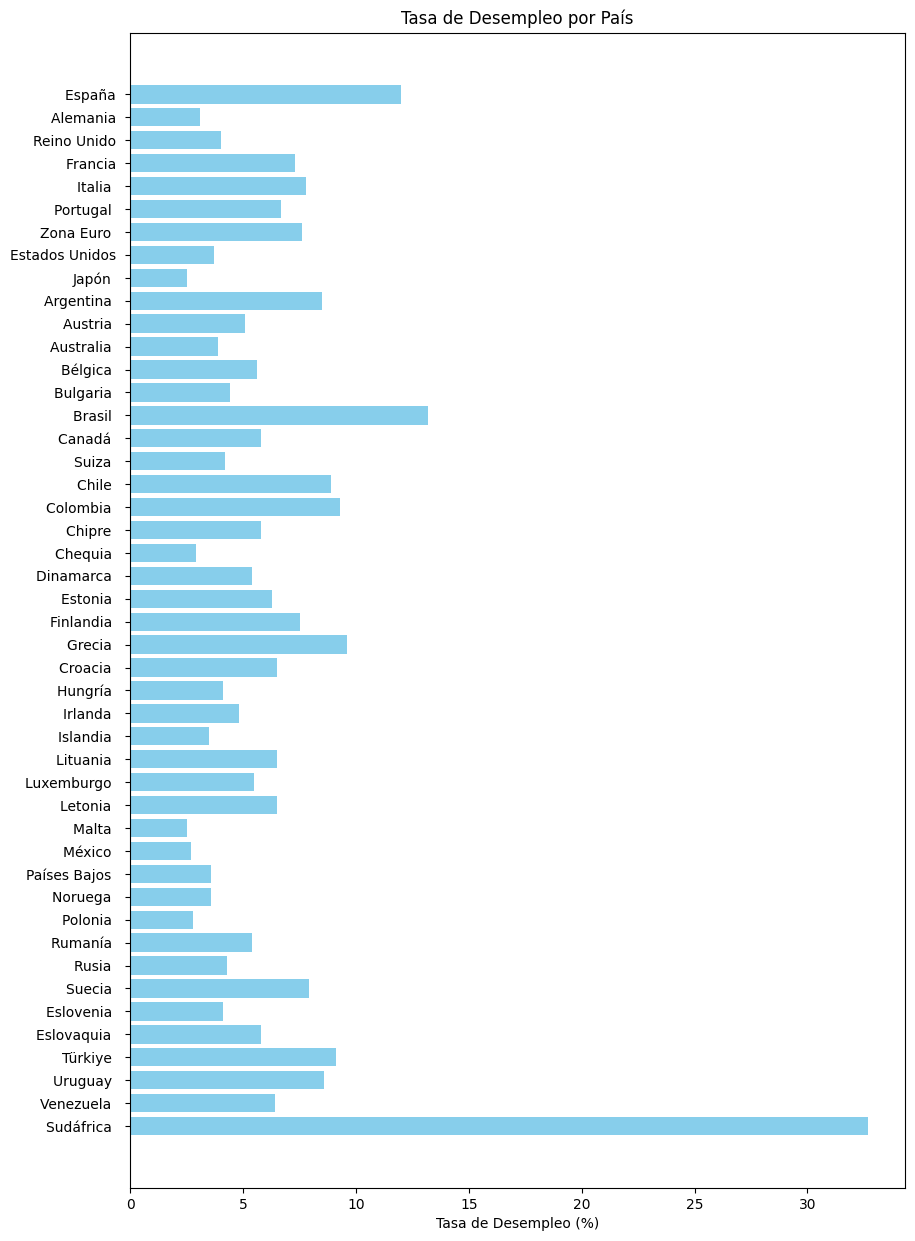

In [104]:
import pandas as pd
import matplotlib.pyplot as plt

# Los datos a graficar
data = {
    '0': [
        'Países', 'España [+]', 'Alemania [+]', 'Reino Unido [+]', 'Francia [+]', 'Italia [+] ', 'Portugal [+] ','Zona Euro [+] ','Estados Unidos ','Japón [+] ','Argentina [+] ',
        'Austria [+] ','Australia [+] ','Bélgica [+] ','Bulgaria [+] ','Brasil [+] ','Canadá [+] ','Suiza [+] ',
        'Chile [+] ','Colombia [+] ','Chipre [+] ','Chequia [+] ','Dinamarca [+] ','Estonia [+] ','Finlandia [+] ','Grecia [+] ','Croacia [+] ','Hungría [+] ',
        'Irlanda [+] ','Islandia [+] ','Lituania [+] ','Luxemburgo [+] ','Letonia [+] ','Malta [+] ','México [+] ','Países Bajos [+] ','Noruega [+] ','Polonia [+] ','Rumanía [+] ',
        'Rusia [+] ','Suecia [+] ','Eslovenia [+] ','Eslovaquia [+] ','Türkiye [+] ','Uruguay [+] ','Venezuela [+] ','Sudáfrica [+] ',

    ],
    '1': [
        'Tasa de desempleo', '12,0%', '3,1%', '4,0%', '7,3%','7,8% ','6,7% ','7,6% ',' 3,7% ','2,5% ','8,5%','5,1% ','3,9% ',
        '5,6% ','4,4% ','13,2% ','5,8% ','4,2% ','8,9% ','9,3% ','5,8% ','2,9% ','5,4%','6,3% ','7,5% ','9,6% ','6,5% ','4,1% ',
        '4,8% ','3,5% ','6,5% ','5,5% ','6,5% ','2,5% ','2,7% ','3,6%  ','3,6% ','2,8% ','5,4%','4,3% ','7,9%','4,1%','5,8% ',
        '9,1% ','8,6% ','6,4% ','32,7% ',

    ]
}

# DataFrame con los datos
df = pd.DataFrame(data)

# Limpieza de datos para visualizacion
df.columns = df.iloc[0]  # Usar la primera fila como nombres de columnas
df = df[1:]  # Eliminar la primera fila (repetida como nombres de columnas)
df = df.replace('\[.*\]', '', regex=True)  # Eliminar los caracteres '[+]'

# Reemplazar comas por puntos y convertir a números
df['Tasa de desempleo'] = df['Tasa de desempleo'].str.replace('%', '').str.replace(',', '.').astype(float)

# Crear el gráfico de barras de la tasa de desempleo por país
plt.figure(figsize=(10, 15))
plt.barh(df['Países'], df['Tasa de desempleo'], color='skyblue')
plt.xlabel('Tasa de Desempleo (%)')
plt.title('Tasa de Desempleo por País')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar los países en orden descendente
plt.show()